In [2]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

## MNIST는 어떻게 생겼나

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이: 60000
5
<built-in method size of Tensor object at 0x7f8eeceb47d0>


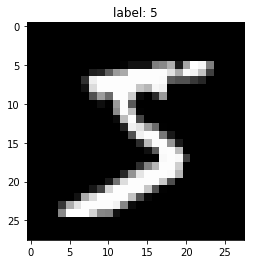

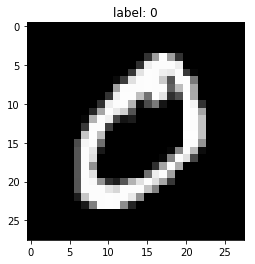

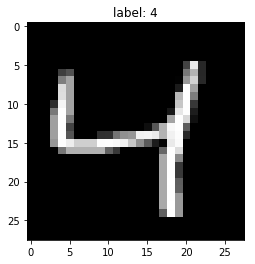

In [5]:
# 1. MNIST 로드
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(), # train용으로 쓰겠다.
                        target_transform=None, download=True)

# 2. 그려보기
# MNIST data 하나 형태 출력
image, label = mnist_train.__getitem__(0) # image = mnist.train[0][0], label = mnist.train[0][1]
print image.size(), label

image, label = mnist_train[1]
print image.size(), label

print mnist_train.__len__()
print "mnist_train 길이:", len(mnist_train)

# 그리기
print mnist_train[0][1] # label
print mnist_train[0][0].size # image

for i in range(3):
    img = mnist_train[i][0].numpy() # image 타입을 numpy로 변환 (1, 28, 28)
    # print "label:", mnist_train[i][1]
    plt.title("label: %d" %mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

## MNIST train, test dataset 가져오기

In [6]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), # train용
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), # test용
                      target_transform=None, download=True)

## 대력적인 데이터 형태

mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태: torch.Size([1, 28, 28])
label: 5


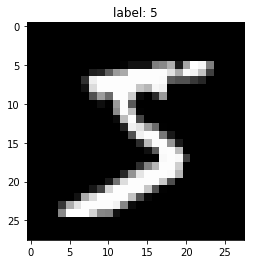

In [7]:
print "mnist_train 길이: ", len(mnist_train)
print "mnist_test 길이: ", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print "image data 형태:", image.size()
print "label:", label

# 그리기
img = image.numpy() # image 타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

## 데이터 로드함수
핛습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [8]:
batch_size = 16

In [9]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                          #mnist_train을 트레인 시키자.
                                          shuffle=True, num_workers=2,
                                          drop_last=True) # batch_size만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_train), batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

## 데이터 로드함수 이해하기

[0]
한번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


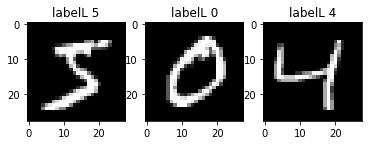

[1]
한번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


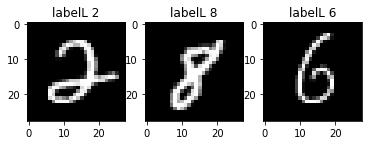

[2]
한번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


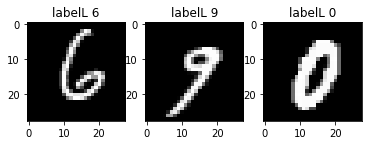

[3]
한번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


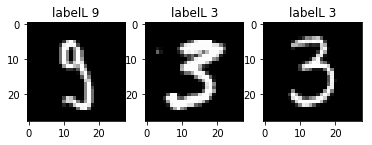

[4]
한번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


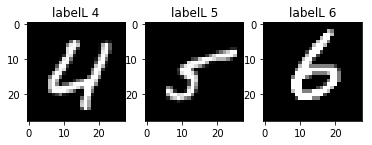

[5]
한번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


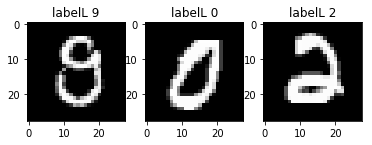

In [12]:
n = 3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader): # batch_size만큼
    if i>5:
        break
        
    print "[%d]" %i
    print "한번에 로드되는 데이터 크기:", len(imgs)
    
    x = Variable(imgs) # (batch_size, 1, 28, 28)
    x = x.reshape((x.shape[0], x.shape[2], x.shape[3])) # (batch_size, 28, 28)
    y = Variable(labels) # (batch_size)
    
    print x.shape
    print y.shape
    
    # 그리기
    for j in range(n):
        img = imgs[j].numpy() # image 타입을 numpy로 변환 (1, 28, 28)
        img = img.reshape((img.shape[1], img.shape[2])) # (28, 28)
        # print img.shape
        
        plt.subplot(1, n, j+1) # (1,3) 형태 플랏의 j번재 자리에 그리겠다
        plt.imshow(img, cmap='gray')
        plt.title("labelL %d" %labels[j])
    plt.show()